<a href="https://colab.research.google.com/github/Rohinkumar1841/LGMVIP-DataScience/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: Image to Pencil Sketch with Python

In [1]:
#Import libraries
import numpy as np
import cv2
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
def show_image(img):
    cv2.imshow('Image' , img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
#Load Image
img = cv2.imread('/content/input_img.png')


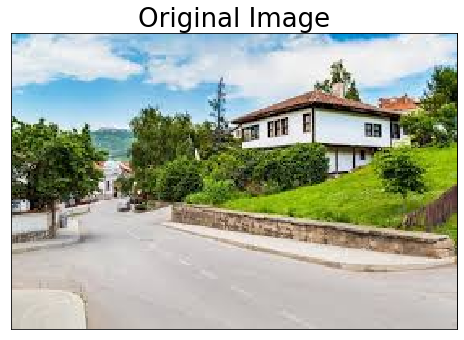

In [10]:
#Display Image
plt.figure(num = 1, figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [11]:
def dodgeV2(image, mask):
    return cv2.divide(image, 255-mask, scale=256)

In [12]:
def blend(front,back):
    result=front*255/(255-back)  
    result[result>255]=255 
    result[back==255]=255 
    return result

In [13]:
def render(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        
    #Applying gaussian blur to grayscale image
    img_blur = cv2.GaussianBlur(img_gray, (21,21), 0, 0)
    
    #Invert the blur image
    inverted_img = 255 - img_blur
    
    #Apply the dodgeV2 function
    img_blend = dodgeV2(img_gray,inverted_img)
    
    #Blend the image
    img_final = 1-blend(img_blend,img_gray)

    return img_final

In [15]:
final_image = render(img)


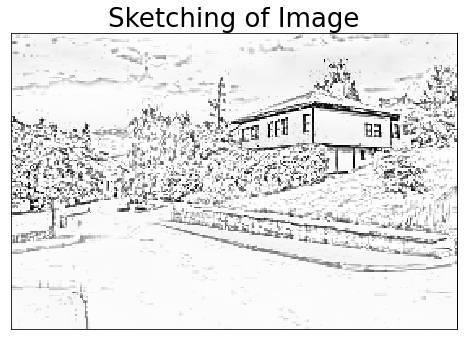

In [16]:
#Display output
plt.figure(figsize=(8,8))
plt.imshow(final_image, cmap="gray")
plt.title('Sketching of Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [17]:
cv2.imwrite('output_img.png', (final_image))

True